# Credit Card Fraud Detection using Machine Learning

This project builds a classification model to identify fraudulent credit card transactions using real-world anonymized data. The dataset is highly imbalanced, making it a good case for applying class imbalance handling techniques and model evaluation strategies.

## 1. Project Overview

- Objective: Build a classifier to detect fraudulent credit card transactions.
- Key challenges: Imbalanced data, sensitive cost of false negatives.
- Techniques used: SMOTE, PCA features, Logistic Regression, Decision Trees, Random Forests, and evaluation using ROC-AUC, Precision, Recall, and Confusion Matrix.

## 2. Dataset Description

The dataset contains European credit card transactions from September 2013. It includes 284,807 transactions, among which only 492 are frauds (0.172%). Features `V1` to `V28` are anonymized using PCA. `Amount` and `Time` are original features. `Class` is the target variable (0 = normal, 1 = fraud).

## 3. Data Loading and Inspection

- Load the CSV file using pandas
- Inspect column types, null values, and basic statistics
- Explore class distribution and understand initial imbalance

## 4. Understanding Features

- `V1` to `V28`: Principal components obtained from PCA transformation
- `Amount`: Transaction amount
- `Time`: Seconds elapsed between this transaction and the first
- `Class`: Target label (1 = fraud, 0 = normal)

## 5. Exploratory Data Analysis

- Visualize class imbalance
- Plot distributions of transaction amount and time for both classes
- Look for outliers, skewness, or patterns that differentiate fraud from normal transactions

## 6. Class Imbalance Analysis

- Fraudulent transactions are only 0.172% of the dataset
- This imbalance can cause biased models that predict majority class
- Solution: Apply techniques like SMOTE (Synthetic Minority Over-sampling Technique)

## 7. Handling Imbalanced Data

- Use SMOTE to oversample minority class
- Ensure resampled dataset is used for model training
- Optionally compare with undersampling or class weighting

## 8. Model Training

- Train baseline models: Logistic Regression, Decision Tree, Random Forest
- Perform training on SMOTE-transformed data
- Use cross-validation where applicable

## 9. Model Evaluation

- Metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC
- Plot Confusion Matrix and ROC curves
- Choose the best model based on minimizing false positives and false negatives

## 10. Conclusion and Future Work

- Summarize best-performing model and its metrics
- Suggest future improvements such as feature selection, ensemble methods, or deep learning
- Highlight real-world implications of fraud detection models

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Path to dataset files: /kaggle/input/creditcardfraud
/kaggle/input/creditcardfraud/creditcard.csv


The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Key Features:
V1 to V28 (Principal Components from PCA):

These represent transformed features obtained via Principal Component Analysis (PCA). They contain aggregated information about the original variables but do not have direct interpretability. The purpose of PCA is to reduce dimensionality while retaining as much variance (information) as possible, so these features still capture relevant patterns but in a compressed form.

Time:

Represents the seconds elapsed between the first transaction and the current transaction. This feature can help detect patterns related to the sequence of transactions (e.g., fraud occurring shortly after the first transaction).

Amount:

This is the transaction amount. In fraud detection, it is often important to identify unusually high or low transaction amounts, as fraudulent transactions sometimes involve significant sums or a change in purchasing patterns.

Class:

The target variable indicating whether a transaction is fraudulent (1) or not (0).

This is a binary classification problem, where the class imbalance is significant, with fraudulent transactions being only 0.172% of the total.

Class Imbalance and Evaluation Metrics:
Class Imbalance:

Fraudulent transactions represent a very small fraction of the dataset, making this a highly imbalanced classification problem. This can lead to misleading results if traditional evaluation metrics like accuracy are used, as the model might predict "non-fraud" for most instances, leading to a high accuracy but poor performance on identifying fraud.

Area Under the Precision-Recall Curve (AUPRC):

Precision-Recall Curves (PRC) are often used in imbalanced classification problems. The PRC focuses on the performance of the model with respect to the positive class (frauds in this case).

AUPRC helps to evaluate the model’s ability to correctly identify fraud while minimizing false positives. It’s more informative than the ROC curve in imbalanced datasets because it emphasizes the positive class, which is the minority class in this case.

# Visualizing Class Distribution in the Dataset

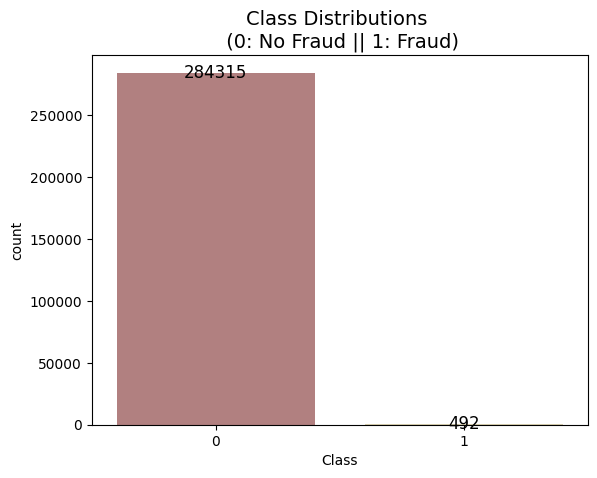

Class
0    284315
1       492
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
sns.countplot(x='Class', data=df, palette = 'pink')

# Set the title
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

# Get the count values
counts = df['Class'].value_counts()

# Annotate the bars with the numerical values
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), 
             f'{int(p.get_height())}', ha='center', va='center', fontsize=12, color='black')

# Show the plot
plt.show()

# Print the numerical values for each class
print(df['Class'].value_counts())


# Insights from the Class Distribution Output

## 1. **Imbalanced Dataset**:
   - The dataset has a significant imbalance between the two classes.
   - **Class 0 (No Fraud)** has **284,315 instances**, making up the vast majority of the dataset.
   - **Class 1 (Fraud)** has only **492 instances**, which is much smaller and represents a very small fraction of the total data.

## 2. **Challenge in Modeling**:
   - The imbalance could pose challenges for modeling, as most machine learning algorithms may be biased towards predicting the majority class (Class 0).
   - Special techniques such as **oversampling**, **undersampling**, or using algorithms designed for imbalanced datasets (e.g., **SMOTE** or **Balanced Random Forest**) may be needed to improve performance for the minority class (Fraud).

## 3. **Impact on Evaluation Metrics**:
   - Standard accuracy may not be a reliable metric here. It is important to focus on metrics like **Precision**, **Recall**, **F1-score**, and **ROC-AUC**, which provide better insights for imbalanced datasets.

## 4. **Data Preprocessing Requirement**:
   - To avoid model bias, preprocessing steps to handle the imbalance (like resampling or class weighting) will likely be necessary for achieving a fair and effective model.


# Oversampling minority class

In [7]:
import pandas as pd

# Assuming df is your dataset
# Separate the majority and minority classes
fraud = df[df['Class'] == 1]  # Minority class (fraud)
non_fraud = df[df['Class'] == 0]  # Majority class (non-fraud)

# Determine how many samples you need to match the minority class size
num_samples_to_generate = len(non_fraud) - len(fraud)

# Randomly sample rows from the minority class to match the majority class
fraud_oversampled = fraud.sample(n=num_samples_to_generate, replace=True, random_state=42)

# Concatenate the oversampled fraud data with the non-fraud data
df_oversampled = pd.concat([non_fraud, fraud, fraud_oversampled], axis=0)

# Shuffle the dataset to ensure the data is mixed
df = df_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after oversampling
print(df['Class'].value_counts())


Class
1    284315
0    284315
Name: count, dtype: int64


In [8]:
df.shape

(568630, 31)

In [9]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

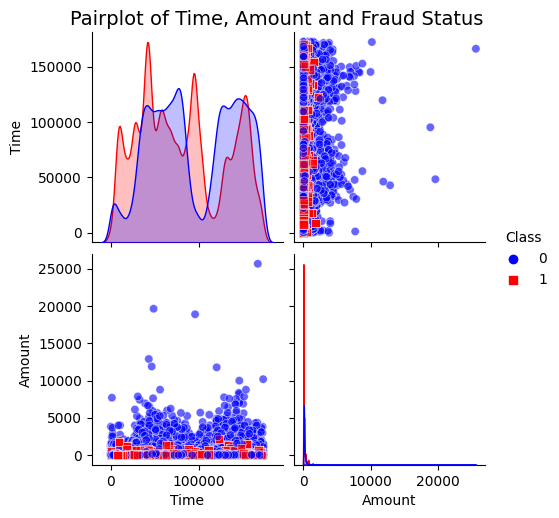

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the pairplot
selected_columns = ['Time', 'Amount','Class']
# Pairplot for 'Time', 'Amount', and 'Class'
sns.pairplot(df[selected_columns], hue='Class', palette={0: 'blue', 1: 'red'}, markers=["o", "s"], plot_kws={'alpha': 0.6})

# Adding title
plt.suptitle('Pairplot of Time, Amount and Fraud Status', fontsize=14, y=1.02)

# Show the plot
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training data shape: {X_train.shape}, Test data shape: {X_test.shape}')

Training data shape: (454904, 30), Test data shape: (113726, 30)


In [12]:
import pandas as pd

# Check class distribution in original dataset
print("Original class distribution:")
print(y.value_counts(normalize=True))

# Check class distribution in training data
print("\nTraining class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

# Check class distribution in testing data
print("\nTesting class distribution:")
print(pd.Series(y_test).value_counts(normalize=True))

Original class distribution:
Class
1    0.5
0    0.5
Name: proportion, dtype: float64

Training class distribution:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64

Testing class distribution:
Class
1    0.5
0    0.5
Name: proportion, dtype: float64


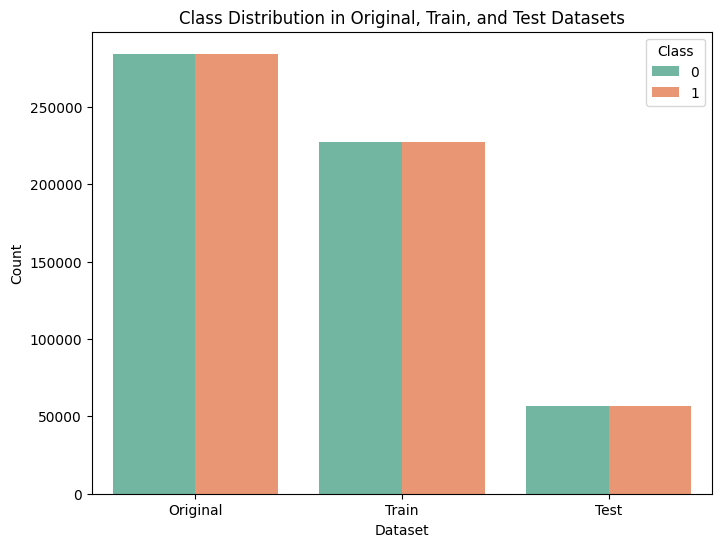

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to hold class distributions
distribution_df = pd.DataFrame({
    'Dataset': ['Original'] * len(y) + ['Train'] * len(y_train) + ['Test'] * len(y_test),
    'Class': pd.concat([y, pd.Series(y_train), pd.Series(y_test)], ignore_index=True)
})

# Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=distribution_df, x='Dataset', hue='Class', palette='Set2')
plt.title('Class Distribution in Original, Train, and Test Datasets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



=== Logistic Regression ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


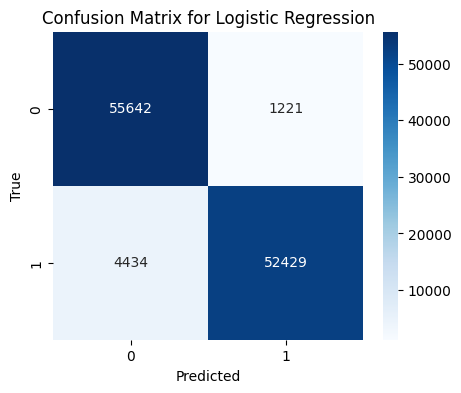


=== Decision Tree ===


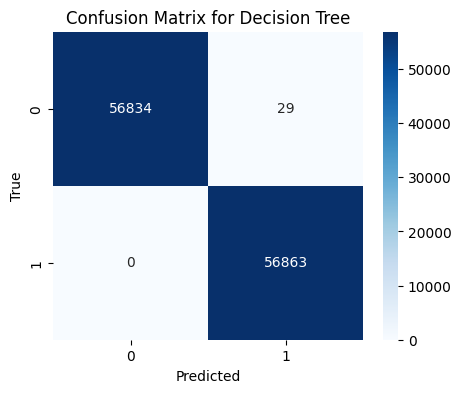


=== Random Forest ===


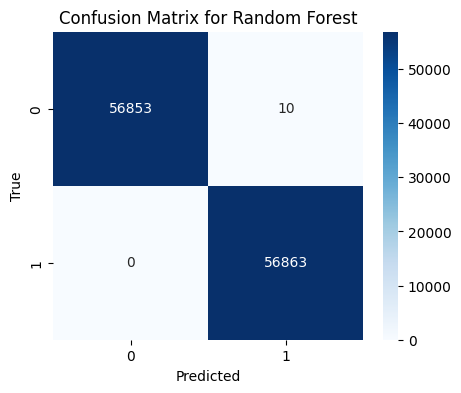


=== K-Nearest Neighbors ===


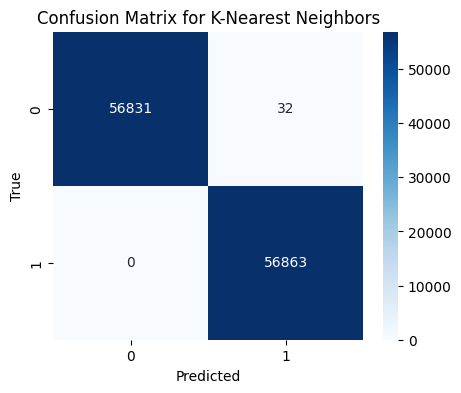


=== XGBoost ===


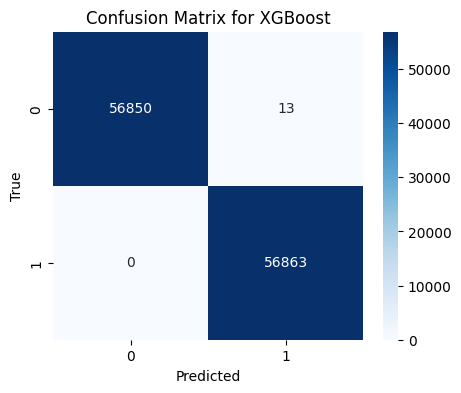

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Initialize a dictionary to store results
result = {}

# 3. Train and Evaluate
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Store accuracy and classification report in the result dictionary
    result[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred),
    }
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# The 'result' dictionary now contains all the evaluation results